In [90]:
# 삼성전자 가격 예측. 회귀분석 이용해보기
# 지도학습!
# ARIMA 시계열 데이터 분석을 통해 저가 예측해보기.
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

<AxesSubplot:xlabel='Date'>

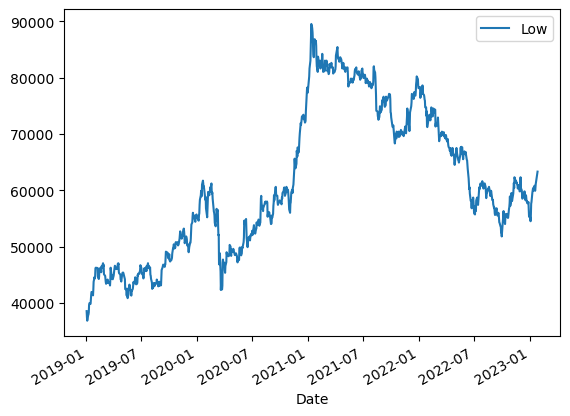

In [91]:
stock = pd.read_csv('Samsung Electronics Stock Price.csv')
# 해당 csv 파일에서 쓰지 않을 나머지 열 제거.
stock = stock.drop(['Open', 'High', 'Close', 'Adj Close', 'Volume'], axis=1)
# 날짜 인덱스화 하고 오름차순으로 정렬
stock['Date']=pd.to_datetime(stock['Date'])
stock.index = stock['Date']
stock.set_index('Date', inplace=True)
stock.plot()

c:\Users\jinw0\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


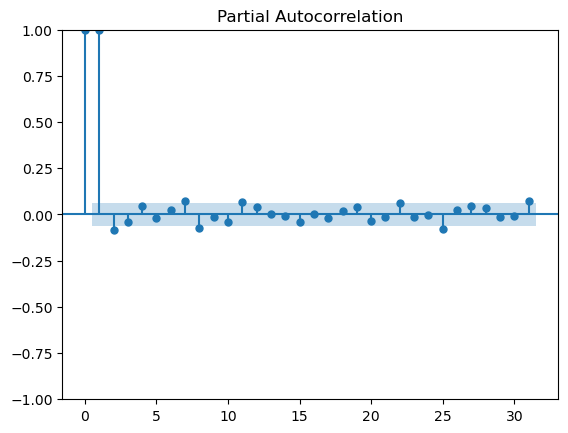

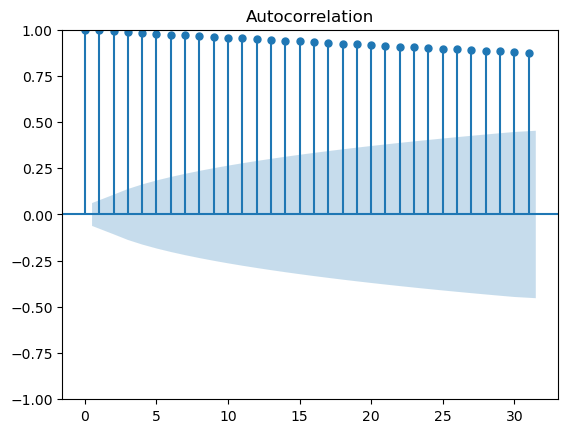

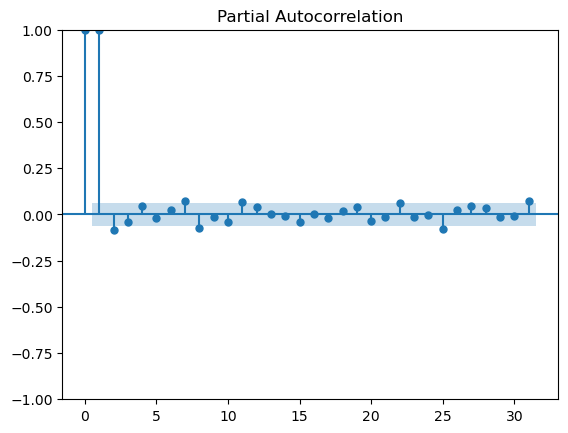

In [92]:
# ARIMA 모수 결정 과정.
# p, q(각각 AR, MA의 Lag를 의미) 정하기 위해 ACF, PACF 그래프 확인.
plot_acf(stock)
plot_pacf(stock)

<AxesSubplot:xlabel='Date'>

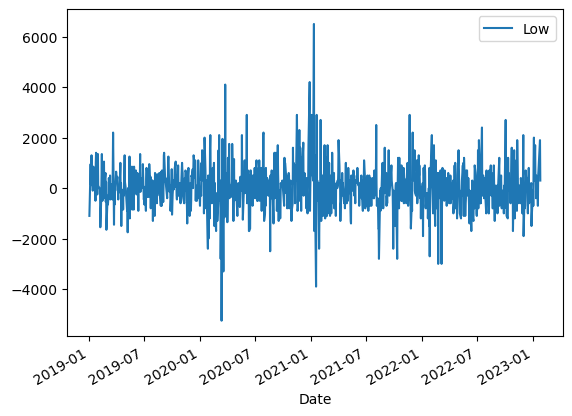

In [93]:
# 확인 결과 ACF은 서서히 감소하는 형태
# PACF는 Time Lag 1 이후로 급격히 감소.
# p + q < 2, p * q = 0인 조건이 좋은 파라미터의 조합이라고 알려져 있음
# p = 1, q = 0으로 하자.
# 이제는 차분을 거칠 차례이다. 
# 차분을 거치면서 혹시모를 결측값에 대비, dropna 사용해주자.
# 차분 후 결과에 대한 ACF, PACF 그래프도 확인해주자.
diff = stock.diff().dropna()
diff.plot()

<AxesSubplot:xlabel='Date'>

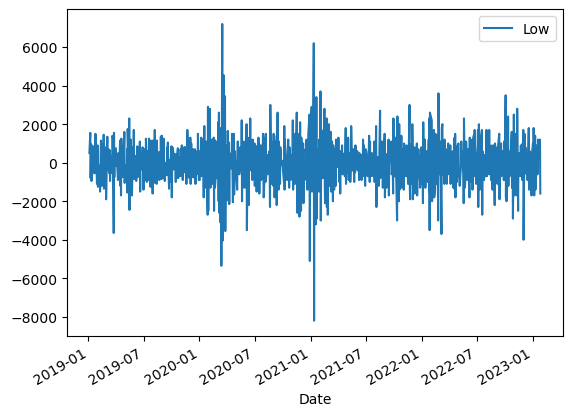

In [94]:
# 1차 차분 결과를 보고 이게 평균이 일정한지 잘 구분을 못하겠으니
# 차분 1번 더 하기
diff2 = diff.diff().dropna()
diff2.plot()

In [97]:
# 확인 결과 차분 2번한게 좀 더 일정해 보이니 차분 횟수 d = 2로 정하자.
# 이제 ARIMA 모델에 적용할 차례.
# 적용 후 summary를 통해 확인해주자.
model = ARIMA(stock, order=(1, 2, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    Low   No. Observations:                 1003
Model:                 ARIMA(1, 2, 0)   Log Likelihood               -8443.961
Date:                Fri, 03 Feb 2023   AIC                          16891.922
Time:                        17:57:41   BIC                          16901.739
Sample:                             0   HQIC                         16895.653
                               - 1003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3742      0.007    -57.462      0.000      -0.387      -0.361
sigma2      1.173e+06   3.21e+04     36.597      0.000    1.11e+06    1.24e+06
Ljung-Box (L1) (Q):                  48.80   Jarque-